<a href="https://colab.research.google.com/github/shumshersubashgautam/QuantumMLEDXSolution-Colab/blob/master/kernelmethods(lotsprocessiapplied)part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Ranlot/edX---Quantum-Machine-Learning.git

Cloning into 'edX---Quantum-Machine-Learning'...
remote: Enumerating objects: 112, done.
remote: Total 112 (delta 0), reused 0 (delta 0), pack-reused 112
Receiving objects: 100% (112/112), 75.45 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 163kB 9.0MB/s 
     |████████████████████████████████| 430kB 52.6MB/s 
     |████████████████████████████████| 15.9MB 21.6MB/s 
     |████████████████████████████████| 2.4MB 28.9MB/s 
     |████████████████████████████████| 808kB 35.5MB/s 
     |████████████████████████████████| 81kB 349kB/s 
     |████████████████████████████████| 2.8MB 33.9MB/s 
     |████████████████████████████████| 122kB 30.1MB/s 
     |████████████████████████████████| 768kB 36.2MB/s 
     |████████████████████████████████| 112kB 52.3MB/s 
     |████████████████████████████████| 184kB 50.9MB/s 
     |████████████████████████████████| 133kB 46.5MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
     |████████████████████████████████| 133kB 52.2MB/s 
     |████████████████████████████████| 952kB 48.5MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 12.9MB 28.9MB/

In [2]:
cd /content/edX---Quantum-Machine-Learning

/content/edX---Quantum-Machine-Learning


In [0]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, BasicAer
import numpy as np

q, c, backend = QuantumRegister(4), ClassicalRegister(4), BasicAer.get_backend('qasm_simulator')

In [5]:
!pip install qiskit

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 17.3MB 23.9MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 983kB 44.5MB/s 
  Using cached https://files.pythonhosted.org/packages/a3/58/35da89ee790598a0700ea49b2a66594140f44dec458c07e8e3d4979137fc/ply-3.11-py2.py3-none-any.whl
     |████████████████████████████████| 5.3MB 30.9MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 21.7MB 61.2MB/s 
     |████████████████████████████████| 563kB 38.4MB/s 
     |████████████████████████████████| 2.3MB 28.2MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Created wheel for qiskit: filename=qiskit-0.13.0-cp36-none-any.whl size=1399 sha256=a54685129ffb41931c74ee8033820c4c7059ac5dfb1

In [0]:
training_set = [[0, 1], [0.78861006, 0.61489363]]
labels = [0, 1]
test_set = [[-0.549, 0.836], [0.053 , 0.999]]

In [0]:
def get_angle(amplitude_0):
    return 2 * np.arccos(amplitude_0)

In [0]:
test_angles = [get_angle(test_set[0][0]) / 2, get_angle(test_set[1][0]) / 2]
training_angle = get_angle(training_set[1][0]) / 4

In [0]:
def prepare_state(q, c, angles):
    ancilla_qubit = q[0]
    index_qubit = q[1]
    data_qubit = q[2]
    class_qubit = q[3]
    circuit = QuantumCircuit(q, c)
    
    # Put the ancilla and the index qubits into uniform superposition
    circuit.h(ancilla_qubit)
    circuit.h(index_qubit)

    # Prepare the test vector
    circuit.cx(ancilla_qubit, data_qubit)
    circuit.u3(-angles[0], 0, 0, data_qubit)
    circuit.cx(ancilla_qubit, data_qubit)
    circuit.u3(angles[0], 0, 0, data_qubit)
    
    # Flip the ancilla qubit > this moves the input 
    # vector to the |0> state of the ancilla
    circuit.x(ancilla_qubit)
    circuit.barrier()

    # Prepare the first training vector
    # [0,1] -> class 0
    # We can prepare this with a Toffoli
    circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
    # Flip the index qubit > moves the first training vector to the 
    # |0> state of the index qubit
    circuit.x(index_qubit)
    circuit.barrier()

    # Prepare the second training vector
    # [0.78861, 0.61489] -> class 1
    circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(angles[1], 0, 0, data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(-angles[1], 0, 0, data_qubit)
    circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(-angles[1], 0, 0, data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(angles[1], 0, 0, data_qubit)
    circuit.barrier()

    # Flip the class label for training vector #2
    circuit.cx(index_qubit, class_qubit)
    circuit.barrier()
    return circuit

In [11]:
from qiskit.tools.visualization import circuit_drawer
angles = [test_angles[0], training_angle]
state_preparation_0 = prepare_state(q, c, angles)
circuit_drawer(state_preparation_0)

In [0]:
def interfere_data_and_test_instances(circuit, q, c, angles):
    circuit.h(q[0])
    circuit.barrier()
    circuit.measure(q, c)
    return circuit

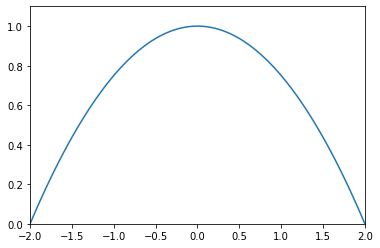

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
plt.xlim(-2, 2); plt.ylim(0, 1.1)
plt.plot(x, 1-x**2/4)

In [0]:
def postselect(result_counts):
    total_samples = sum(result_counts.values())

    # define lambda function that retrieves only results where the ancilla is in the |0> state
    post_select = lambda counts: [(state, occurences) for state, occurences in counts.items() if state[-1] == '0']

    # perform the postselection
    postselection = dict(post_select(result_counts))
    postselected_samples = sum(postselection.values())

    print(f'Ancilla post-selection probability was found to be {postselected_samples/total_samples}')

    retrieve_class = lambda binary_class: [occurences for state, occurences in postselection.items() if state[0] == str(binary_class)]

    prob_class0 = sum(retrieve_class(0))/postselected_samples
    prob_class1 = sum(retrieve_class(1))/postselected_samples

    print('Probability for class 0 is', prob_class0)
    print('Probability for class 1 is', prob_class1)


In [15]:
circuit_0 = interfere_data_and_test_instances(state_preparation_0, q, c, angles)
job = execute(circuit_0, backend, shots=1000)
result = job.result()
postselect(result.get_counts(circuit_0))

Ancilla post-selection probability was found to be 0.734
Probability for class 0 is 0.6185286103542235
Probability for class 1 is 0.3814713896457766


In [16]:
angles = [test_angles[1], training_angle]
state_preparation_1 = prepare_state(q, c, angles)
circuit_1 = interfere_data_and_test_instances(state_preparation_1, q, c, angles)
job = execute(circuit_1, backend, shots=1000)
result = job.result()
postselect(result.get_counts(circuit_1))

Ancilla post-selection probability was found to be 0.909
Probability for class 0 is 0.5324532453245324
Probability for class 1 is 0.4675467546754675


In [0]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.visualization import circuit_drawer
import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn import datasets
from sklearn.preprocessing import normalize, StandardScaler

In [0]:
iris = datasets.load_iris()

In [0]:
irisData = pd.DataFrame({_[0]: iris.data[:, _[1]] for _ in zip(iris.feature_names, range(len(iris.feature_names)))})
labelNames = {_[0]: _[1] for _ in zip(range(len(iris.target_names)), iris.target_names)}
irisData['label'] = [labelNames[_] for _ in iris.target]

In [0]:
setosa = irisData[irisData['label'] == 'setosa']
versicolor = irisData[irisData['label'] == 'versicolor']
virginica = irisData[irisData['label'] == 'virginica']

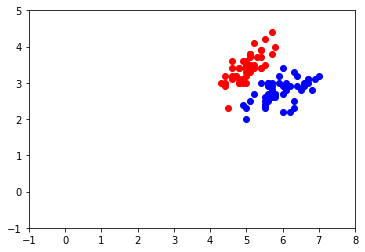

In [21]:
fig, ax = plt.subplots()
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], color='b')
ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], color='r')
ax.set_xlim([-1, 8]); ax.set_ylim([-1, 5]); ax.set_aspect('equal')

In [0]:
selectedData = irisData[irisData['label'].isin(['versicolor', 'setosa'])]
selectedData = selectedData[['sepal length (cm)', 'sepal width (cm)', 'label']]

scaler = StandardScaler().fit(selectedData[['sepal length (cm)', 'sepal width (cm)']])
normalizedData = scaler.transform(selectedData[['sepal length (cm)', 'sepal width (cm)']])
normalizedData = normalize(normalizedData)

normalizedData = pd.DataFrame({'sepal length (cm)': normalizedData[:, 0],
                               'sepal width (cm)': normalizedData[:, 1],
                               'label': selectedData['label']})

In [0]:
normVersicolor = normalizedData[normalizedData['label'] == 'versicolor']
normSetosa = normalizedData[normalizedData['label'] == 'setosa']

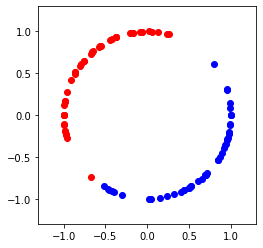

In [24]:

fig, ax = plt.subplots()
ax.scatter(normVersicolor['sepal length (cm)'], normVersicolor['sepal width (cm)'], color='b')
ax.scatter(normSetosa['sepal length (cm)'], normSetosa['sepal width (cm)'], color='r')
ax.set_xlim([-1.3, 1.3]); ax.set_ylim([-1.3, 1.3]); ax.set_aspect('equal')


In [25]:
normalizedData.iloc[[33, 85, 28, 55]]

,sepal length (cm),sepal width (cm),label
33,0.019647,0.999807,setosa
85,0.795134,0.606434,versicolor
28,-0.557585,0.830120,setosa
55,0.496113,-0.868258,versicolor


In [0]:
x0 = [0.019647, 0.999807]      # class 0
x1 = [0.795134, 0.606434]      # class 1

xprime = [-0.557585, 0.830120] # suppposed to be in class 0
#xprime = [0.496113, -0.868258] # suppposed to be in class 1

In [0]:
numbQubits = 4
q, c = QuantumRegister(numbQubits), ClassicalRegister(numbQubits)
circuit = QuantumCircuit(q, c)

In [28]:

theta1 = np.arctan2(x1[1], x1[0])                 # angles for state encoding
thetaPrime = 2 * np.arctan2(xprime[1], xprime[0]) # angles for state encoding

circuit.h(q[0])
circuit.h(q[1])

circuit.cu3(thetaPrime, 0, 0, q[0], q[2])

circuit.x(q[0])
circuit.ccx(q[0], q[1], q[2])
circuit.x(q[1])
circuit.ccx(q[0], q[1], q[2])

circuit.cu3(- theta1, 0, 0, q[1], q[2])
circuit.ccx(q[0], q[1], q[2])
circuit.cu3(theta1, 0, 0, q[1], q[2])

circuit.cx(q[1], q[3])

In [29]:

circuit.h(q[0])

circuit.measure(q, c)

In [30]:
circuit_drawer(circuit)

In [31]:
shots = 1000

qmlResult = execute(circuit, backend = BasicAer.get_backend('qasm_simulator'), shots = shots)
qmlCounts = qmlResult.result().get_counts(circuit)

qmlCounts


{'0000': 49,
 '0001': 33,
 '0100': 433,
 '0101': 4,
 '1010': 7,
 '1011': 231,
 '1110': 242,
 '1111': 1}

In [32]:
conditionalCounts = {_: qmlCounts[_] for _ in qmlCounts.keys() if _[3] == '0'}

conditionalCounts

{'0000': 49, '0100': 433, '1010': 7, '1110': 242}

In [33]:
class0Counts = [qmlCounts[_] for _ in conditionalCounts if _[2] == '0']
class1Counts = [qmlCounts[_] for _ in conditionalCounts if _[2] == '1']

print(class0Counts > class1Counts)

True


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import dimod

n_spins = 3
h = {v: 1 for v in range(n_spins)}
J = {(0, 1): 2, (1, 2): -1}

model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()


In [35]:
!pip install dimod

     |████████████████████████████████| 839kB 2.8MB/s 


In [37]:
temperature = 1
response = sampler.sample(model, beta_range=[1 / temperature, 1 / temperature], num_reads=400)

responseData = list(response.aggregate().data())
responseData


[Sample(sample={0: 1, 1: -1, 2: -1}, energy=-4.0, num_occurrences=282),
 Sample(sample={0: -1, 1: -1, 2: -1}, energy=-2.0, num_occurrences=42),
 Sample(sample={0: -1, 1: 1, 2: -1}, energy=-2.0, num_occurrences=39),
 Sample(sample={0: -1, 1: 1, 2: 1}, energy=-2.0, num_occurrences=29),
 Sample(sample={0: 1, 1: -1, 2: 1}, energy=0.0, num_occurrences=6),
 Sample(sample={0: -1, 1: -1, 2: 1}, energy=2.0, num_occurrences=2)]

In [38]:
import pandas as pd

degeneracy = dict(pd.DataFrame(responseData).groupby('energy').count()['num_occurrences'])
energyLevels = degeneracy.keys()

degeneracy

{-4.0: 1, -2.0: 3, 0.0: 1, 2.0: 1}

In [39]:
probabilities = np.array([degeneracy[E] * np.exp(-E/temperature) for E in energyLevels])
Z = probabilities.sum()
probabilities /= Z

probabilities

array([0.70086896, 0.2845569 , 0.01283686, 0.00173728])

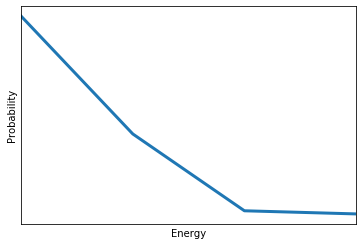

In [40]:
fig, ax = plt.subplots()
ax.plot([E for E in energyLevels], probabilities, linewidth=3)
ax.set_xlim(min(energyLevels), max(energyLevels))
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('Energy'); ax.set_ylabel('Probability')
plt.show()

In [0]:
from dimod.reference.samplers.simulated_annealing import greedy_coloring

clamped_spins = {0: -1}
num_sweeps = 10000

βs = np.linspace(1, 0, num_sweeps)

In [42]:
adj = {n: set() for n in h}
for n0, n1 in J:
    adj[n0].add(n1)
    adj[n1].add(n0)
    
adj

{0: {1}, 1: {0, 2}, 2: {1}}

In [0]:
_, colors = greedy_coloring(adj)

In [0]:
spins = {v: np.random.choice((-1, 1)) if v not in clamped_spins else clamped_spins[v] for v in h}

for β in βs:
    energy_diff_h = {v: -2 * spins[v] * h[v] for v in h}

    # for each color, do updates
    for color in colors:
        nodes = colors[color]
        energy_diff_J = {}
        for v0 in nodes:
            ediff = 0
            for v1 in adj[v0]:
                if (v0, v1) in J:
                    ediff += spins[v0] * spins[v1] * J[(v0, v1)]
                if (v1, v0) in J:
                    ediff += spins[v0] * spins[v1] * J[(v1, v0)]

            energy_diff_J[v0] = -2. * ediff
        for v in filter(lambda x: x not in clamped_spins, nodes):
            logp = np.log(np.random.uniform(0, 1))
            if logp < -1. * β * (energy_diff_h[v] + energy_diff_J[v]):
                spins[v] *= -1

In [45]:
spins

{0: -1, 1: 1, 2: 1}

In [0]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer

π = np.pi

In [0]:

q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')

qft = QuantumCircuit(q, c)

qft.h(q[0])
qft.cu1(π/2, q[1], q[0])
qft.h(q[1])
qft.cu1(π/4, q[2], q[0])
qft.cu1(π/2, q[2], q[1])
qft.h(q[2]);

In [48]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qft)

In [0]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

qpe = QuantumCircuit(q, c)
qpe.h(q[0])
qpe.h(q[1]);

In [0]:
# Controlled-U0
qpe.cz(q[1], q[2]);
# Controlled-U1
# nothing: identity

In [0]:
qpe.swap(q[0], q[1])
qpe.h(q[1])
qpe.cu1(-π / 2, q[0], q[1])
qpe.h(q[0])
qpe.swap(q[0], q[1]);

In [0]:
qpe.measure(q[0], c[0])
qpe.measure(q[1], c[1]);

In [53]:
circuit_drawer(qpe)

In [54]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qpe, backend, shots=1000)
result = job.result()
result.get_counts(qpe)

{'00': 1000}

In [55]:
qpe = QuantumCircuit(q, c)
qpe.h(q[0])
qpe.h(q[1])
qpe.x(q[2]) # create |1> in the main register

qpe.cz(q[1], q[2])

qpe.swap(q[0], q[1])
qpe.h(q[1])
qpe.cu1(- π / 2, q[0], q[1])
qpe.h(q[0])
qpe.swap(q[0], q[1])

qpe.measure(q[0], c[0])
qpe.measure(q[1], c[1]);

backend = BasicAer.get_backend('qasm_simulator')
job = execute(qpe, backend, shots=1000)
result = job.result()
result.get_counts(qpe)

{'10': 1000}

In [0]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer

π = np.pi

In [57]:
A = 0.5 * np.array([[3, 1], [1, 3]])
b = np.array([1, 0])

x = np.linalg.solve(A, b)
x /= np.linalg.norm(x)

print('(normalized) solution is %s' % x)

(normalized) solution is [ 0.9486833  -0.31622777]


In [0]:
q = QuantumRegister(6)
c = ClassicalRegister(2)
hhl = QuantumCircuit(q, c)


In [0]:
# Superposition
hhl.h(q[1])
hhl.h(q[2])

# Controlled-U0
hhl.cu3(-π / 2, -π / 2, π / 2, q[2], q[3])
hhl.cu1(3 * π / 4, q[2], q[3])
hhl.cx(q[2], q[3])
hhl.cu1(3 * π / 4, q[2], q[3])
hhl.cx(q[2], q[3])

# Controlled-U1
hhl.cx(q[1], q[3]);

In [0]:
hhl.swap(q[1], q[2])
hhl.h(q[2])
hhl.cu1(-π / 2, q[1], q[2])
hhl.h(q[1]);

In [0]:
hhl.swap(q[1], q[2]);

In [0]:
hhl.cu3(0.392699, 0, 0, q[1], q[0])  # Controlled-RY0
hhl.cu3(0.19634955, 0, 0, q[2], q[0]);  # Controlled-RY1

In [0]:
hhl.swap(q[1], q[2])
hhl.h(q[1])
hhl.cu1(π / 2, q[1], q[2])  # Inverse(Dagger(Controlled-S))
hhl.h(q[2])
hhl.swap(q[2], q[1])

# Inverse(Controlled-U1)
hhl.cx(q[1], q[3])

# Inverse(Controlled-U0)
hhl.cx(q[2], q[3])
hhl.cu1(-3 * π / 4, q[2], q[3])
hhl.cx(q[2], q[3])
hhl.cu1(-3 * π / 4, q[2], q[3])
hhl.cu3(-π / 2, π / 2, -π / 2, q[2], q[3])

# End of Inverse(Controlled-U0)
hhl.h(q[2])
hhl.h(q[1]);

In [0]:
# Target state preparation
hhl.rz(-π, q[4])
hhl.u1(π, q[4])
hhl.h(q[4])
hhl.ry(-0.9311623288419387, q[4])
hhl.rz(π, q[4]);

In [66]:
def verifExpectedState():
    q, c = QuantumRegister(1), ClassicalRegister(1)
    circuit = QuantumCircuit(q, c)
    circuit.rz(-π, q[0])
    circuit.u1(π, q[0])
    circuit.h(q[0])
    circuit.ry(-0.9311623288419387, q[0])
    circuit.rz(π, q[0])

    backend_statevector = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend_statevector)
    return job.result().get_statevector(circuit)

verifExpectedState()

array([ 0.94929297+0.j, -0.31439284+0.j])

In [0]:

# Swap test
hhl.h(q[5])
hhl.cx(q[4], q[3])
hhl.ccx(q[5], q[3], q[4])
hhl.cx(q[4], q[3])
hhl.h(q[5])

# Final measurements
hhl.barrier(q)
hhl.measure(q[0], c[0])
hhl.measure(q[5], c[1]);

In [0]:

def get_psuccess(counts):
    succ_rotation_fail_swap = counts['11'] if '11' in counts.keys() else 0
    succ_rotation_succ_swap = counts['01']
    
    succ_rotation = succ_rotation_succ_swap + succ_rotation_fail_swap
    return succ_rotation_succ_swap / succ_rotation

In [69]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(hhl, backend, shots=1000)
result = job.result()
counts = result.get_counts(hhl)

counts

{'00': 862, '01': 98, '10': 40}

In [70]:
get_psuccess(counts)

1.0